In [36]:
import cv2
import numpy as np
from PIL import Image as PILImage
from IPython.display import display, Image, clear_output, Video, HTML
from time import sleep
import io
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
import time
from IPython import InteractiveShell
import cv2
from IPython.display import display, clear_output, publish_display_data
import time
import numpy as np
from ipywidgets import IntProgress
import concurrent.futures
from copy import copy
from collections import Counter

In [2]:

def display_mat(m):
    img_cv2 = cv2.imencode('.jpg', m)
    display(Image(data=img_cv2[1].tobytes()))


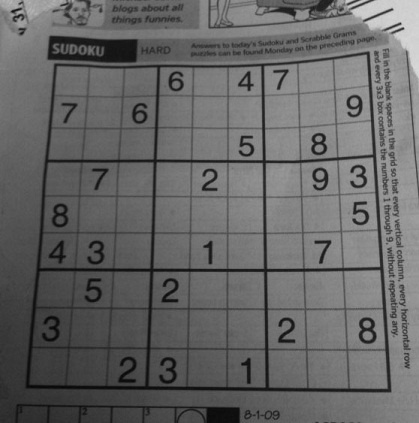

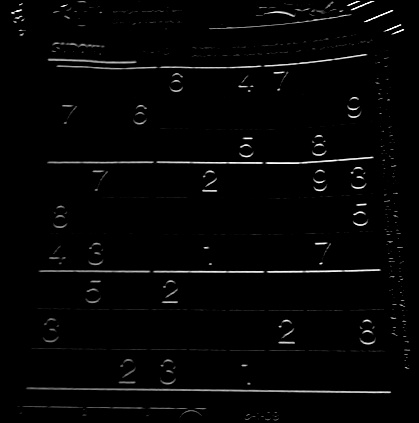

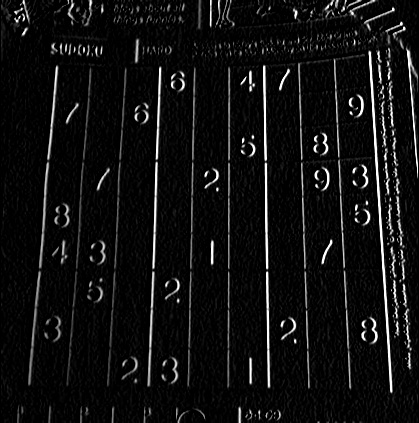

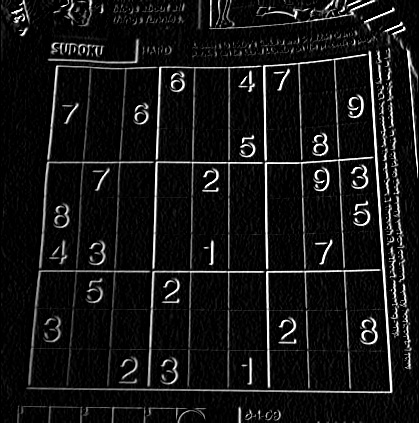

In [6]:
from copy import copy
sudo = cv2.imread('resources/sudoku-original.jpg', cv2.IMREAD_GRAYSCALE)

display_mat(sudo)

fil_v = [
    [-1, -2, -1],
    [0, 0, 0],
    [1, 1, 1]
]
fil_h = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]

sudo_v = cv2.filter2D(sudo, -1, np.array(fil_v))
sudo_h = cv2.filter2D(sudo, -1, np.array(fil_h))

display_mat(sudo_v)
display_mat(sudo_h)

display_mat(cv2.add(sudo_v, sudo_h))

In [7]:

def prepare_frames(cap, apply_function_on_frame: callable = None, limit_frames: int = None):
    frames = {}
    if apply_function_on_frame is None:
        apply_function_on_frame = lambda f: cv2.cvtColor(f, cv2.COLOR_BGR2RGB)

    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if limit_frames is not None and limit_frames < length:
        length = limit_frames

    f = IntProgress(min=0, max=length)
    display(f)

    def add_frame_to_dict(frame, frame_id):
        frame_rgb = apply_function_on_frame(frame)
        format_dict, md_dict = InteractiveShell.instance().display_formatter.format(PILImage.fromarray(frame_rgb))
        frames[frame_id] = format_dict

        f.value += 1

    task_li = []
    with concurrent.futures.ThreadPoolExecutor(max_workers=15) as executor:
        for fr_id in range(length):
            ret, fr = cap.read()

            if not ret:
                break  # Break the loop if there are no more frames

            task_li.append(executor.submit(add_frame_to_dict, fr, fr_id))

        concurrent.futures.wait(task_li)

    frames = dict(sorted(frames.items()))
    return list(frames.values())

def play_frames(frames):
    for frame in frames:
            display(frame, raw=True)
            clear_output(wait=True)
            time.sleep(0.01)

    # Release the video capture object and close the display
    cap.release()
    clear_output(wait=True)


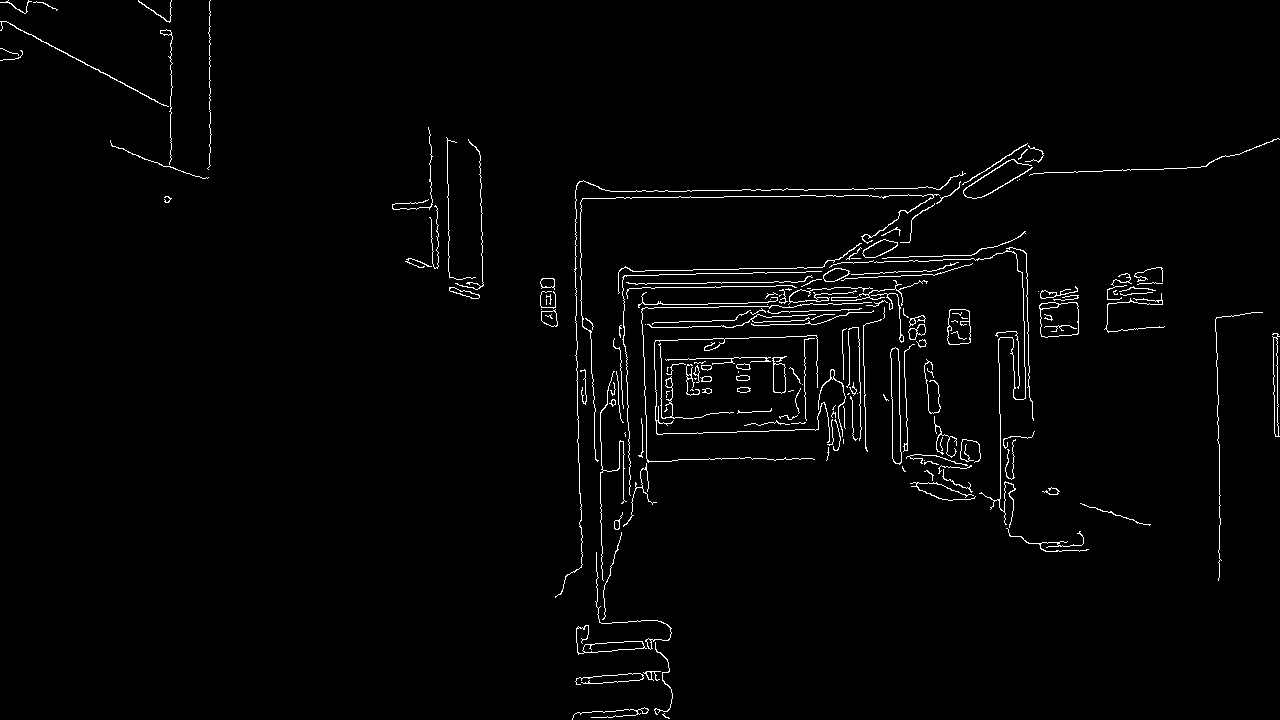

In [20]:
video_path = 'resources/video.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path, cv2.IMREAD_GRAYSCALE)

def filtr(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.blur(frame, (3, 3))
    frame = cv2.Canny(frame, 20, 100, 3)
    return frame

buffer = prepare_frames(cap, apply_function_on_frame=filtr, limit_frames=300)
play_frames(buffer)


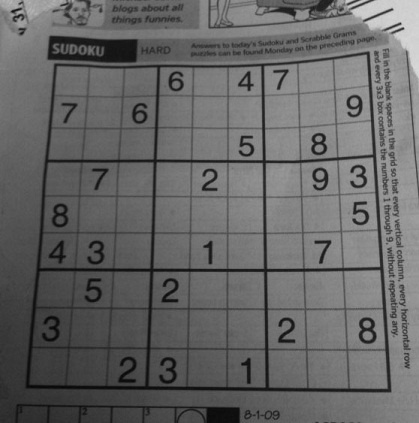

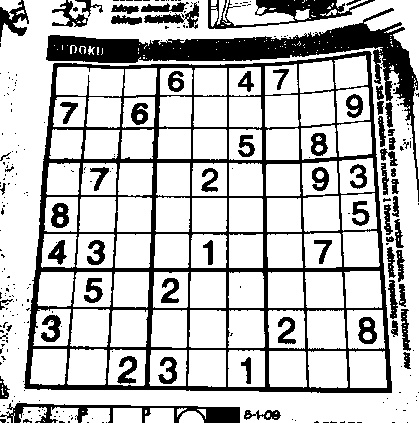

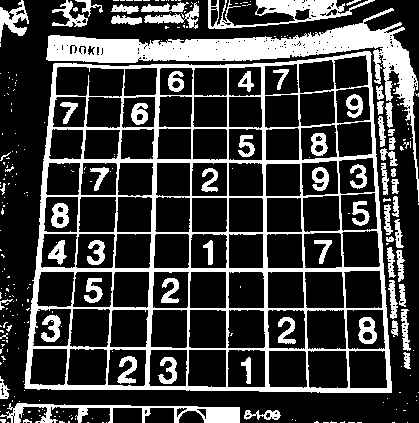

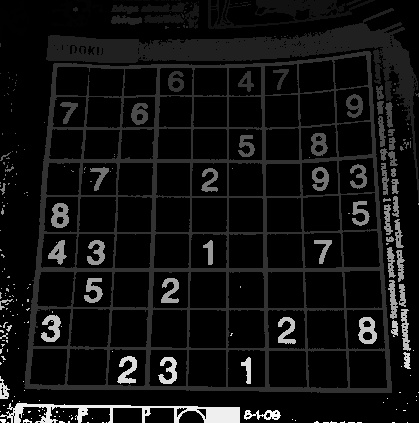

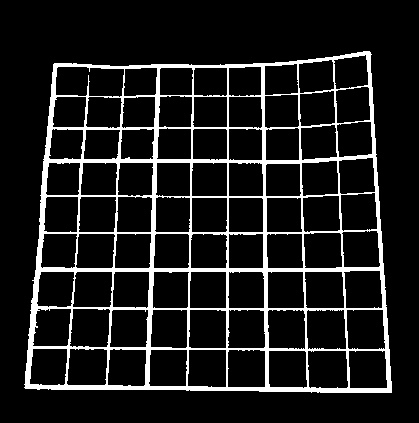

cross filter:


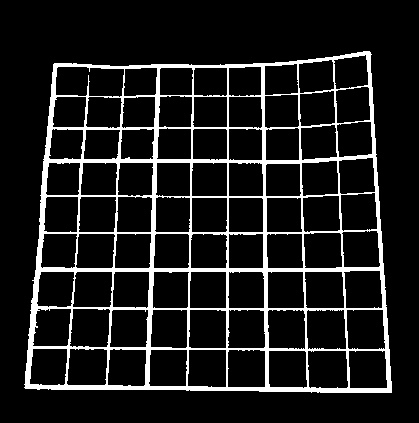

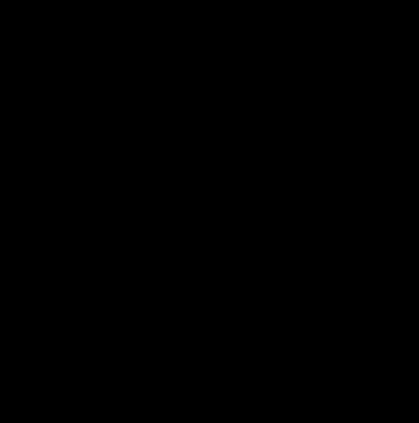

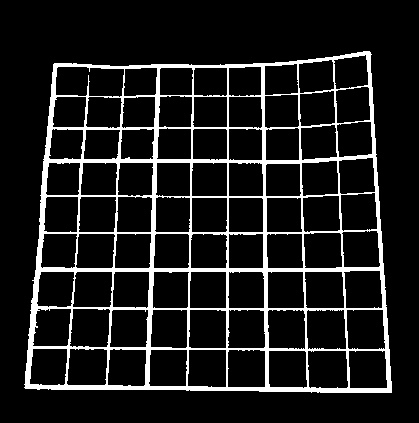

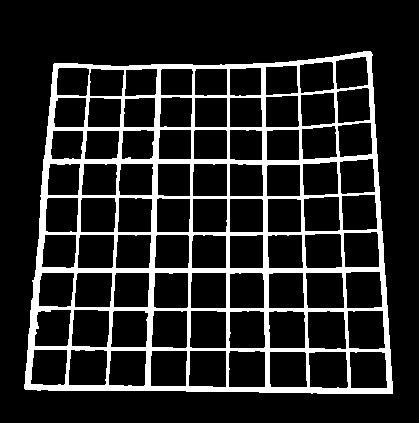

In [110]:
from copy import copy
sudo = cv2.imread('resources/sudoku-original.jpg', cv2.IMREAD_GRAYSCALE)

clear_output(wait=False)
display_mat(sudo)

sudo = cv2.adaptiveThreshold(sudo, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 215, 2)
display_mat(sudo)

sudo_inv = 255 - sudo
display_mat(sudo_inv)

_, sudo_conn = cv2.connectedComponents(sudo_inv, 8)
display_mat(sudo_conn)


# GET GRID:

flat_sudo_conn = sudo_conn.flatten()

di = Counter(flat_sudo_conn)
di.pop(0)

grid_intencity = max(di, key=di.get)

mask = (sudo_conn == grid_intencity)
grid = sudo_conn.copy()
grid[~mask] = np.uint8(0)
grid[mask] = np.uint8(255)
grid = grid.astype(np.uint8)
display_mat(grid)


elem_siz = 1
struc_elem = cv2.getStructuringElement(cv2.MORPH_CROSS, (elem_siz, elem_siz))

grid = cv2.erode(grid, struc_elem)
print('cross filter:')
display_mat(grid)


# fil_v = [
#     [1, 1, 1],
#     [1, -8, 1],
#     [1, 1, 1]
# ]
# grid = cv2.filter2D(grid, -1, np.array(fil_v))
# print('filtr:')
# display_mat(grid)

n, sudo_conn = cv2.connectedComponents(grid, 8)
display_mat(sudo_conn)

flat_sudo_conn = sudo_conn.flatten()

di = Counter(flat_sudo_conn)
di.pop(0)

grid_intencity = max(di, key=di.get)

mask = (sudo_conn == grid_intencity)
grid = sudo_conn.copy()
grid[~mask] = np.uint8(0)
grid[mask] = np.uint8(255)
grid = grid.astype(np.uint8)
display_mat(grid)

elem_siz = 4
struc_elem = cv2.getStructuringElement(cv2.MORPH_RECT, (elem_siz, elem_siz))

grid = cv2.dilate(grid, struc_elem)
elem_siz = 3
struc_elem = cv2.getStructuringElement(cv2.MORPH_RECT, (elem_siz, elem_siz))

grid = cv2.erode(grid, struc_elem)
display_mat(grid)

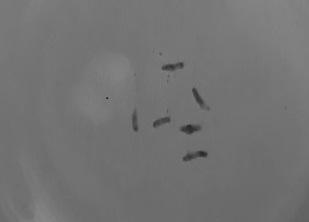

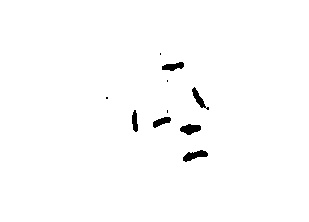

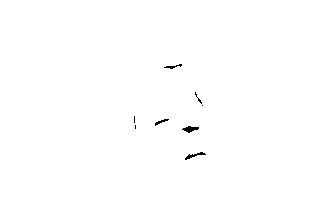

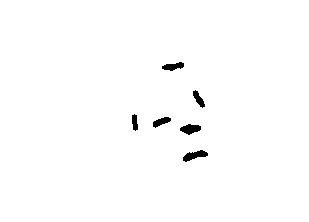

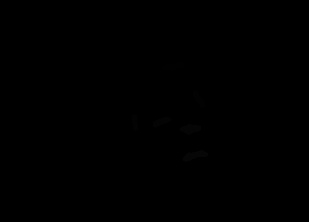

maxart: 6
minart: 3
Counter({6: 158, 5: 150, 1: 122, 4: 108, 2: 101, 3: 77})


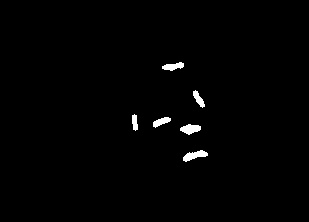

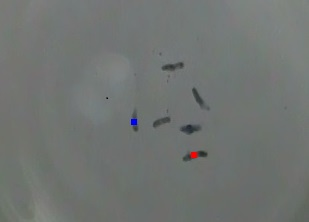

In [127]:
mat = cv2.imread('resources/artemias.jpg', cv2.IMREAD_GRAYSCALE)
display_mat(mat)

_, mat = cv2.threshold(mat, 95, 255, cv2.THRESH_BINARY)
display_mat(mat)

elem_siz = 5
struc_elem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (elem_siz, elem_siz))
mat = cv2.dilate(mat, struc_elem)
display_mat(mat)

mat = cv2.erode(mat, struc_elem)
display_mat(mat)

mat_inv = 255 - mat
mat_inv = mat_inv.astype(np.uint8)

_, mat_conn = cv2.connectedComponents(mat_inv, 8)
display_mat(mat_conn)
flat_mat_conn = mat_conn.flatten()

di = Counter(flat_mat_conn)
di.pop(0)
max_art = max(di, key=di.get)
min_art = min(di, key=di.get)

print(f'maxart: {max_art}')
print(f'minart: {min_art}')
print(di)

display_mat(mat_inv)

max_coord = []
min_coord = []

for i in range(mat_conn.shape[0]):
    for ii in range(mat_conn.shape[1]):
        if mat_conn[i][ii] == max_art:
            max_coord.append((i, ii))
        if mat_conn[i][ii] == min_art:
            min_coord.append((i, ii))

max_ceter = np.array(max_coord).mean(axis=0)
min_ceter = np.array(min_coord).mean(axis=0)

mat = cv2.imread('resources/artemias.jpg')
radius = 3

for i in range(int(max_ceter[0]) - radius, int(max_ceter[0]) + radius):
    for ii in range(int(max_ceter[1]) - radius, int(max_ceter[1]) + radius):
        mat[i][ii] = (0, 0, 255)

for i in range(int(min_ceter[0]) - radius, int(min_ceter[0]) + radius):
    for ii in range(int(min_ceter[1]) - radius, int(min_ceter[1]) + radius):
        mat[i][ii] = (255, 0, 0)
display_mat(mat)